# Time Series Problem Set: Question 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part (a)

In [2]:
N = 250
v = np.random.multivariate_normal(mean=np.zeros(2), cov=np.identity(2), size=N)
eta1 = v[:-1, 0] - 0.7*v[1:, 0] - 0.6*v[1:, 1]
eta2 = -0.5*v[1:, 0] + v[:-1, 1] - 0.7*v[1:, 1]

corr = np.corrcoef(eta1, eta2)[0, 1]
print(f'Correlation coefficient: {corr}')

Correlation coefficient: 0.31834882275290255


## Part (b)

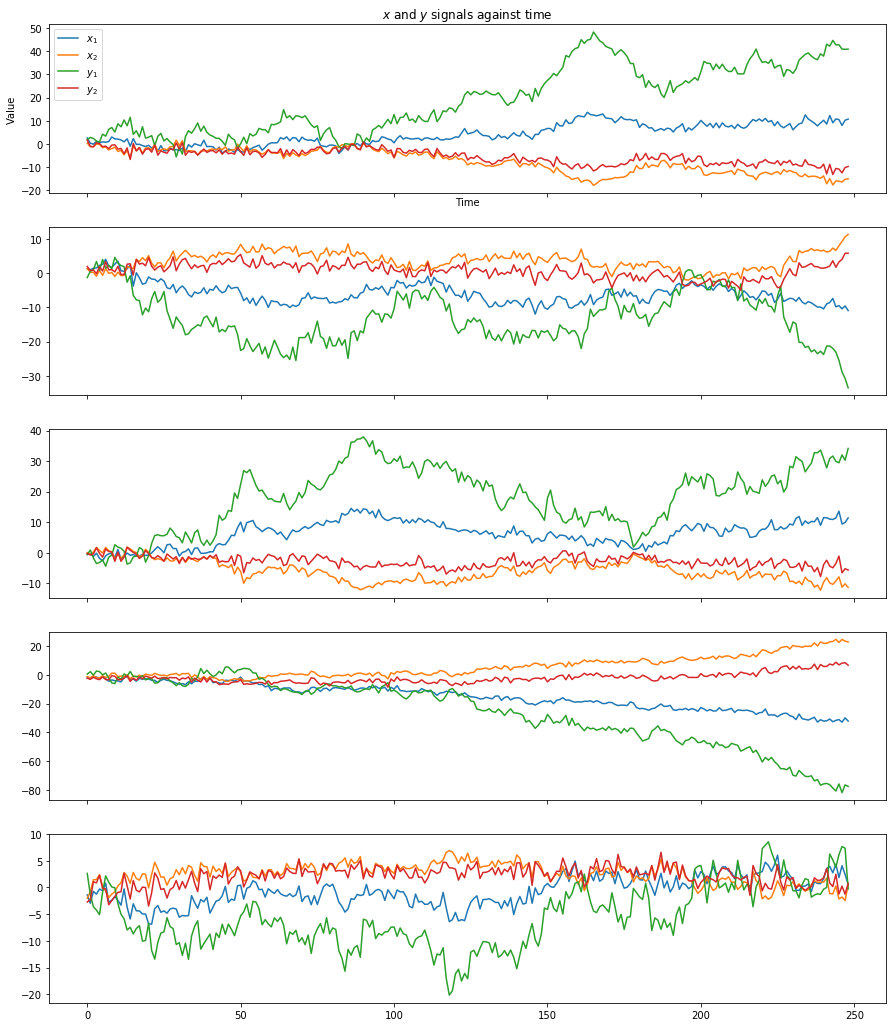

In [3]:
N = 250
T = np.array([[1, -2], [0.5, 1]])

fig, axarr = plt.subplots(ncols=1, nrows=5, sharex=True, figsize=[15, 18])

for i, ax in enumerate(axarr.flatten()):
    v = np.random.multivariate_normal(mean=np.zeros(2), cov=np.identity(2), size=N)
    eta1 = v[:-1, 0] - 0.7*v[1:, 0] - 0.6*v[1:, 1]
    eta2 = -0.5*v[1:, 0] + v[:-1, 1] - 0.7*v[1:, 1]

    # Simple cumulative sum, since x_0 = 0
    x1 = eta1.cumsum()
    x2 = eta2.cumsum()
    x = np.vstack([x1, x2]).T

    y = (T @ x.T).T  # Multiplying each row of x by T
    
    ax.plot(x[:, 0], label='$x_1$')
    ax.plot(x[:, 1], label='$x_2$')
    ax.plot(y[:, 0], label='$y_1$')
    ax.plot(y[:, 1], label='$y_2$')

axarr[0].set_title('$x$ and $y$ signals against time')
axarr[0].set_xlabel('Time')
axarr[0].set_ylabel('Value')
axarr[0].legend();

## Part (c)

$y_2$ has a correlogram that dies out much more sharply than $y_1$. Qualitatively, this indicates that $y_2$ is "more stationary" than $y_1$.

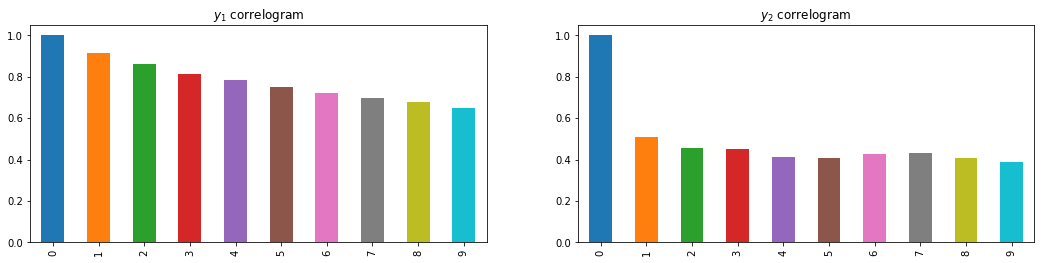

In [4]:
fig, axarr = plt.subplots(ncols=2, nrows=1, figsize=[18, 4])

y1_series = pd.Series(y[:, 0])
y2_series = pd.Series(y[:, 1])

pd.Series([y1_series.autocorr(lag=l) for l in range(10)]).plot(kind='bar', title='$y_1$ correlogram', ax=axarr[0]);
pd.Series([y2_series.autocorr(lag=l) for l in range(10)]).plot(kind='bar', title='$y_2$ correlogram', ax=axarr[1]);

## Part (d)

The $y_1$ time series generally has a non-zero "slope": that is, it looks like it has some long-term linear trend. On the other hand, the $y_2$ time series more or less "hugs" the x-axis (i.e. zero mean), and is stationary.